In [18]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv("Gemini_1INCHUSD_1h.csv", index_col = ['date'], parse_dates = True)
df = df[['unix','symbol','open','high','low','close','Volume 1INCH' ,'Volume USD']]
df.head(n=10)

,unix,symbol,open,high,low,close,Volume 1INCH,Volume USD
date,,,,,,,,
2022-04-27 00:00:00,1651017600000,1INCH/USD,1.2871,1.2932,1.2865,1.2888,428.840257,552.689323
2022-04-26 23:00:00,1651014000000,1INCH/USD,1.2968,1.2970,1.2589,1.2871,1189.529669,1531.043637
2022-04-26 22:00:00,1651010400000,1INCH/USD,1.3093,1.3124,1.2961,1.2968,1281.291941,1661.579389
2022-04-26 21:00:00,1651006800000,1INCH/USD,1.2981,1.3116,1.2959,1.3093,2868.856831,3756.194249
2022-04-26 20:00:00,1651003200000,1INCH/USD,1.3053,1.3095,1.2900,1.2981,2084.128819,2705.407620
2022-04-26 19:00:00,1650999600000,1INCH/USD,1.3203,1.3240,1.2917,1.3053,12134.329536,15838.940343
2022-04-26 18:00:00,1650996000000,1INCH/USD,1.3213,1.3213,1.3105,1.3203,460.162917,607.553099
2022-04-26 17:00:00,1650992400000,1INCH/USD,1.3324,1.3324,1.3104,1.3213,2447.070851,3233.314715
2022-04-26 16:00:00,1650988800000,1INCH/USD,1.3181,1.3362,1.3092,1.3324,1160.667932,1546.473953


<ipython-input-25-62ef16a79084>:14: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(y, model = 'additive', freq = 12)


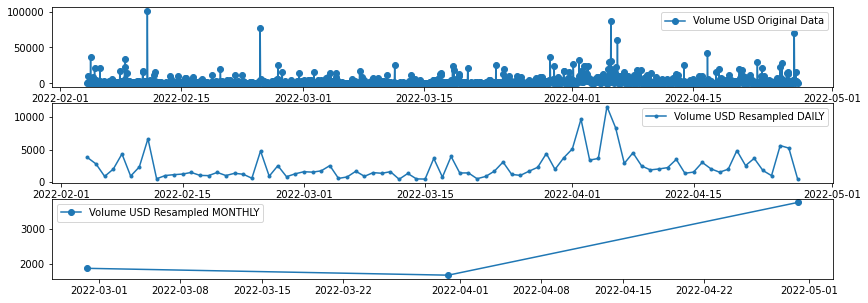

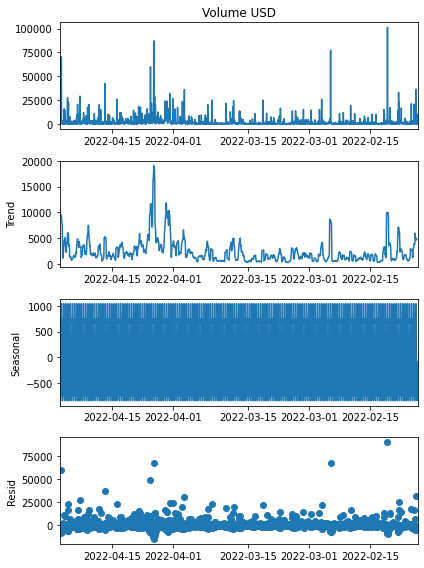

In [25]:
y = df['Volume USD']
fig, ax = plt.subplots(3, 1, figsize = (14, 5))
ax[0].plot(y, marker = 'o', linestyle = '-', label = "Volume USD Original Data")
ax[1].plot(y.resample('D').mean(), marker = '.', linestyle = '-', label = "Volume USD Resampled DAILY")
ax[2].plot(y.resample('M').mean(), marker = 'o', linestyle = '-', label = "Volume USD Resampled MONTHLY")
#ax[3].plot(y.resample('Y').mean(), marker = '.', linestyle = '-', label = "Volume USD Resampled ANNUAL")
for i in range(0, 3):
    ax[i].legend()

'''
Seasonal-Decomposition of USD Volume
-> Additive Decomposition Model for USD Volume
'''
decomposition = seasonal_decompose(y, model = 'additive', freq = 12)
'''
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid)
print(decomposition.observed)
'''
decomposition.plot()
plt.show()

In [ ]:
'''
Basic Autocorrelation Coefficients/Values/Functions:
[pct_change, autocorr, corr, shift, diff, np.log, mean difference, rolling correlation, pacf, acf, white noise, lag plots]
'''
